# Identificaiton of Trend and Checking Stationarity on Air Passenger data

In [135]:
import numpy as np 
import pandas as pd
import scipy 
import matplotlib.pyplot as plt 
from datetime import datetime

In [159]:
df = pd.read_csv('./AirPassengers.csv')
df

,index,value
0,1949 Jan,112
1,1949 Feb,118
2,1949 Mar,132
3,1949 Apr,129
4,1949 May,121
...,...,...
139,1960 Aug,606
140,1960 Sep,508
141,1960 Oct,461
142,1960 Nov,390


          date  value  year  month  t_increments
0   1949-01-01    112  1949      1             0
1   1949-02-01    118  1949      2             1
2   1949-03-01    132  1949      3             2
3   1949-04-01    129  1949      4             3
4   1949-05-01    121  1949      5             4
..         ...    ...   ...    ...           ...
139 1960-08-01    606  1960      8           139
140 1960-09-01    508  1960      9           140
141 1960-10-01    461  1960     10           141
142 1960-11-01    390  1960     11           142
143 1960-12-01    432  1960     12           143

[144 rows x 5 columns]


/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_25150/235233905.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['index'] = pd.to_datetime(df['index'])


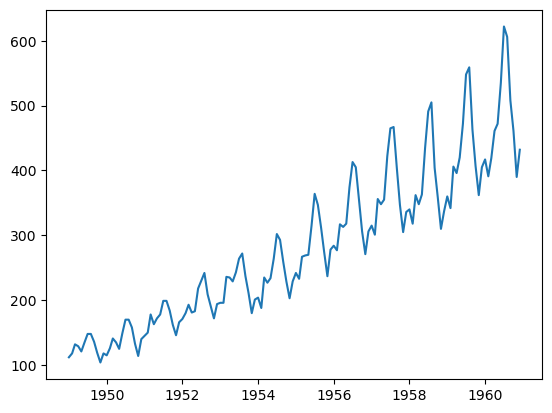

In [161]:
df['index'] = pd.to_datetime(df['index'])
df['year'] = df['index'].dt.year
# Encode Month with dummy vairables 0 or 1 for year
df['month'] = df['index'].dt.month
df.rename(columns={'index':'date'}, inplace=True)
df['t_increments'] = range(0, len(df))
print(df)
x_ticks = np.arange(1949, 1960, 10)
plt.figure()
plt.plot(df['date'], df['value'])
plt.show()

Clearly it is not statioanry thus we need to do some detrending inorder for it to have a E(Yt) = 0. So, 
we can fit a least squares to data

(array([ 7.47406227e+00, -7.27904928e-02,  3.20607842e-04]), 416447.7560815097, 3, array([1.33791503e+07, 1.83880001e+04, 9.92174458e+01]))


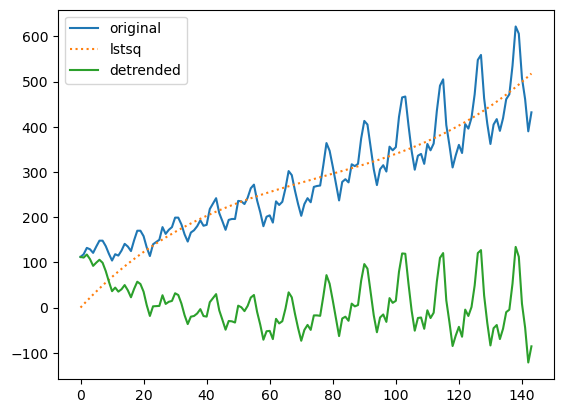

In [201]:
X = df['t_increments'] 
Y = df['value']
# try Y0 = b0t + b1*t^2 + b2*t^3
A = np.ones((len(X), 3))
A[:, 0] = X
A[:, 1] = X**2 
A[:, 2] = X**3 

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0]*X + xls[1]* X**2 + xls[2]* X**3

plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

(array([ 1.36565564e+02,  3.37252241e-02, -1.18116489e-04]), 288228.62509736244, 3, array([1.33791503e+07, 1.83839838e+04, 6.03102420e+00]))


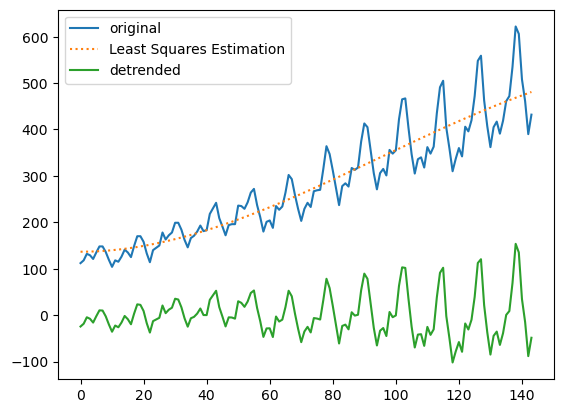

In [205]:
# try Y0 = b0 + b1*t^2 + b2*t^3
A = np.ones((len(X), 3))
A[:, 1] = X**2 
A[:, 2] = X**3 

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0] + xls[1]* X**2 + xls[2]* X**3

plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

(array([90.30996169,  2.65718391]), 301219.11848659004, 2, array([992.51782234,   6.03094788]))


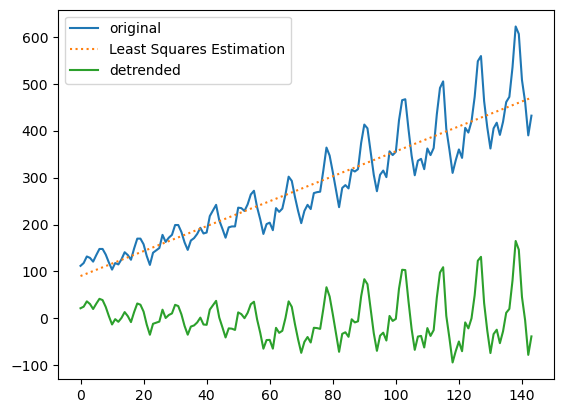

In [207]:
# try Y0 = b0 + b1*t
A = np.ones((len(X), 2))
A[:, 1] = X

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0] + xls[1]* X

plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

(array([1.58208581e+02, 1.78489846e-02]), 327476.43806596124, 2, array([1.10315354e+05, 8.01726180e+00]))


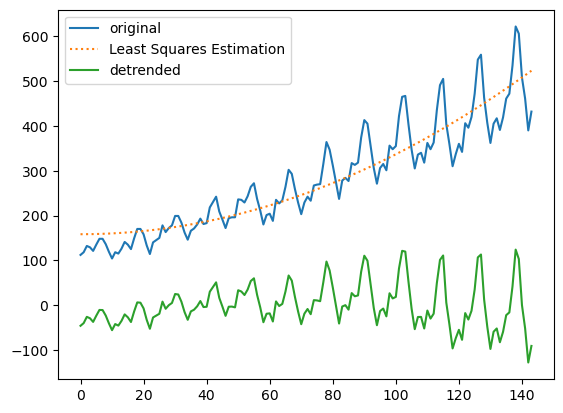

In [211]:
# try Y0 = b0 + b1*t^2
A = np.ones((len(X), 2))
A[:, 1] = X**2

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0] + xls[1]* X**2

plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

(array([ 1.29205404e+02,  4.99981554e-02, -4.00778108e-04,  1.23222799e-06]), 284649.7441953701, 4, array([1.69314445e+09, 1.67236266e+06, 5.25135763e+03, 4.84334846e+00]))


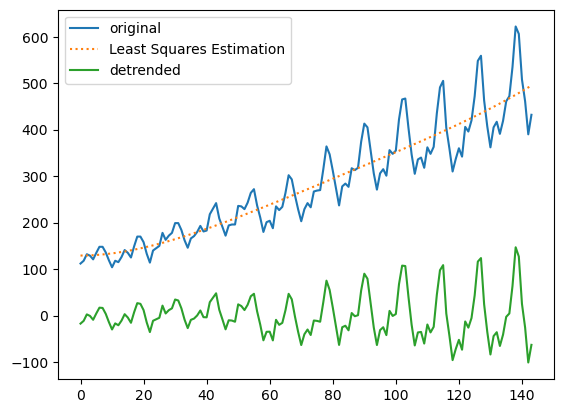

In [213]:
# try Y0 = b0 + b1*t^2 + b2*t^3 + b3*t^4 
A = np.ones((len(X), 4))
A[:, 1] = X**2 
A[:, 2] = X**3 
A[:, 3] = X**4

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0] + xls[1]* X**2 + xls[2]* X**3 + xls[3]* X**4

plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

(array([ 1.26888484e+02,  6.20204661e-02, -7.59035851e-04,  4.74785554e-06,
       -1.12101639e-08]), 284354.61667650763, 5, array([2.19762477e+11, 1.69296046e+08, 3.71651775e+05, 1.96841595e+03,
       4.05491013e+00]))
the mean of the detrended value is -4.4787647023191033e-07 


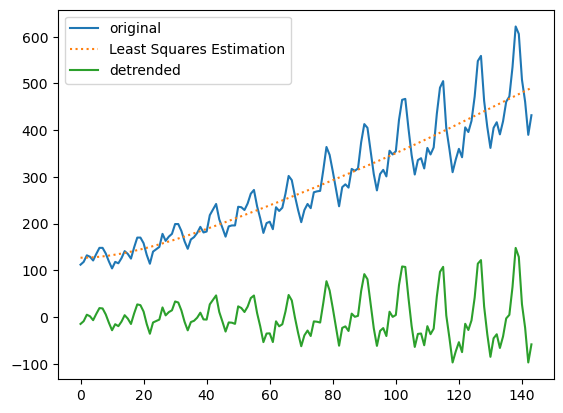

In [223]:
# try Y0 = b0 + b1*t^2 + b2*t^3 + b3*t^4 + b4*t^5
A = np.ones((len(X), 5))
A[:, 1] = X**2 
A[:, 2] = X**3 
A[:, 3] = X**4
A[:, 4] = X**5

sol = scipy.linalg.lstsq(A, Y)
xls = sol[0]
xls
print(sol)

Y0 = xls[0] + xls[1]* X**2 + xls[2]* X**3 + xls[3]* X**4 + xls[4]* X**5
detrended = Y-Y0
print(f"the mean of the detrended value is {detrended.mean()} ")
plt.figure()
plt.plot(X, Y, label='original')
plt.plot(X, Y0, linestyle = 'dotted',label='Least Squares Estimation')
plt.plot(X, Y-Y0, label='detrended')
plt.legend()
plt.show()

# Anlysis of detrending with different models
Clearly from testing different variation of models we find the least square approximation which reduced the RSS the most is Y0 = b0 + b1*t^2 + b2*t^3 + b3*t^4 + b4*t^5  
Now we analysis the stationarity of the detrended times series

In [ ]:
import statsmodels.api as sm